In [166]:
#import libraries
#for data reading
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

Read dataset

In [167]:
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')

In [168]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Data exploration

In [169]:
# getting their shapes

print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [170]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [172]:
train.employee_id.value_counts()

employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64

In [173]:
train.department.value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [174]:
train.region.value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

In [175]:
train.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [176]:
train.gender.value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

In [177]:
train.recruitment_channel.value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

In [178]:
train.no_of_trainings.value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

In [179]:
print("Age varies from: ",train.age.min(),'yrs to',train.age.max(),'yrs')

Age varies from:  20 yrs to 60 yrs


In [180]:
train.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [181]:
print("The years of employment varies from: ",train.length_of_service.min(),'yrs to',train.length_of_service.max(),'yrs')

The years of employment varies from:  1 yrs to 37 yrs


In [182]:
train['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

In [183]:
train['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

In [184]:
print("Average score ranges between: ",train.avg_training_score.min(),'to',train.avg_training_score.max())

Average score ranges between:  39 to 99


In [185]:
train.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

Perform EDA (Exploratory Data Analysis)

In [186]:
# Exclude non-numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
cor = train[numeric_columns].corr()

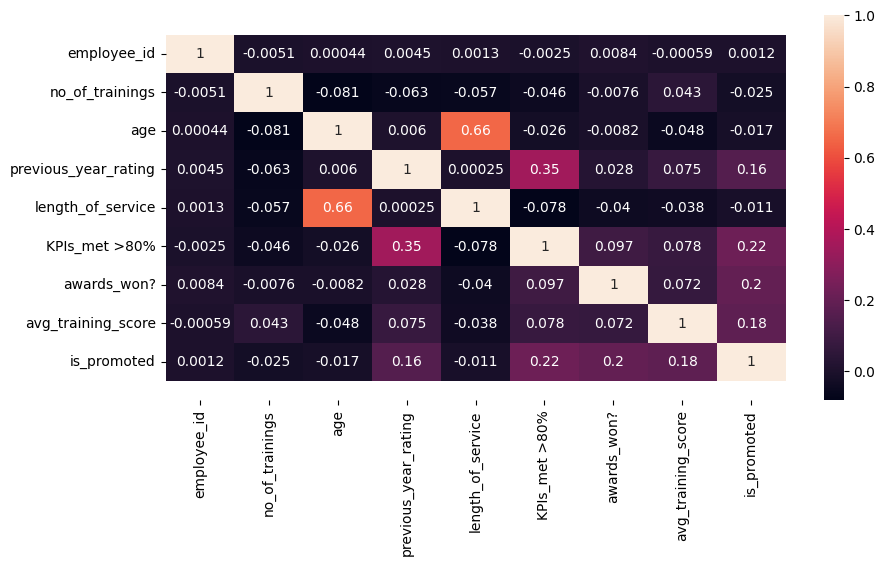

In [187]:
# Plot correlation matrix
plt.figure(figsize=(10, 5))
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [188]:
#The target variable is not significantly correlated with other variables.
#The age variable is highly correlated with the length of service.

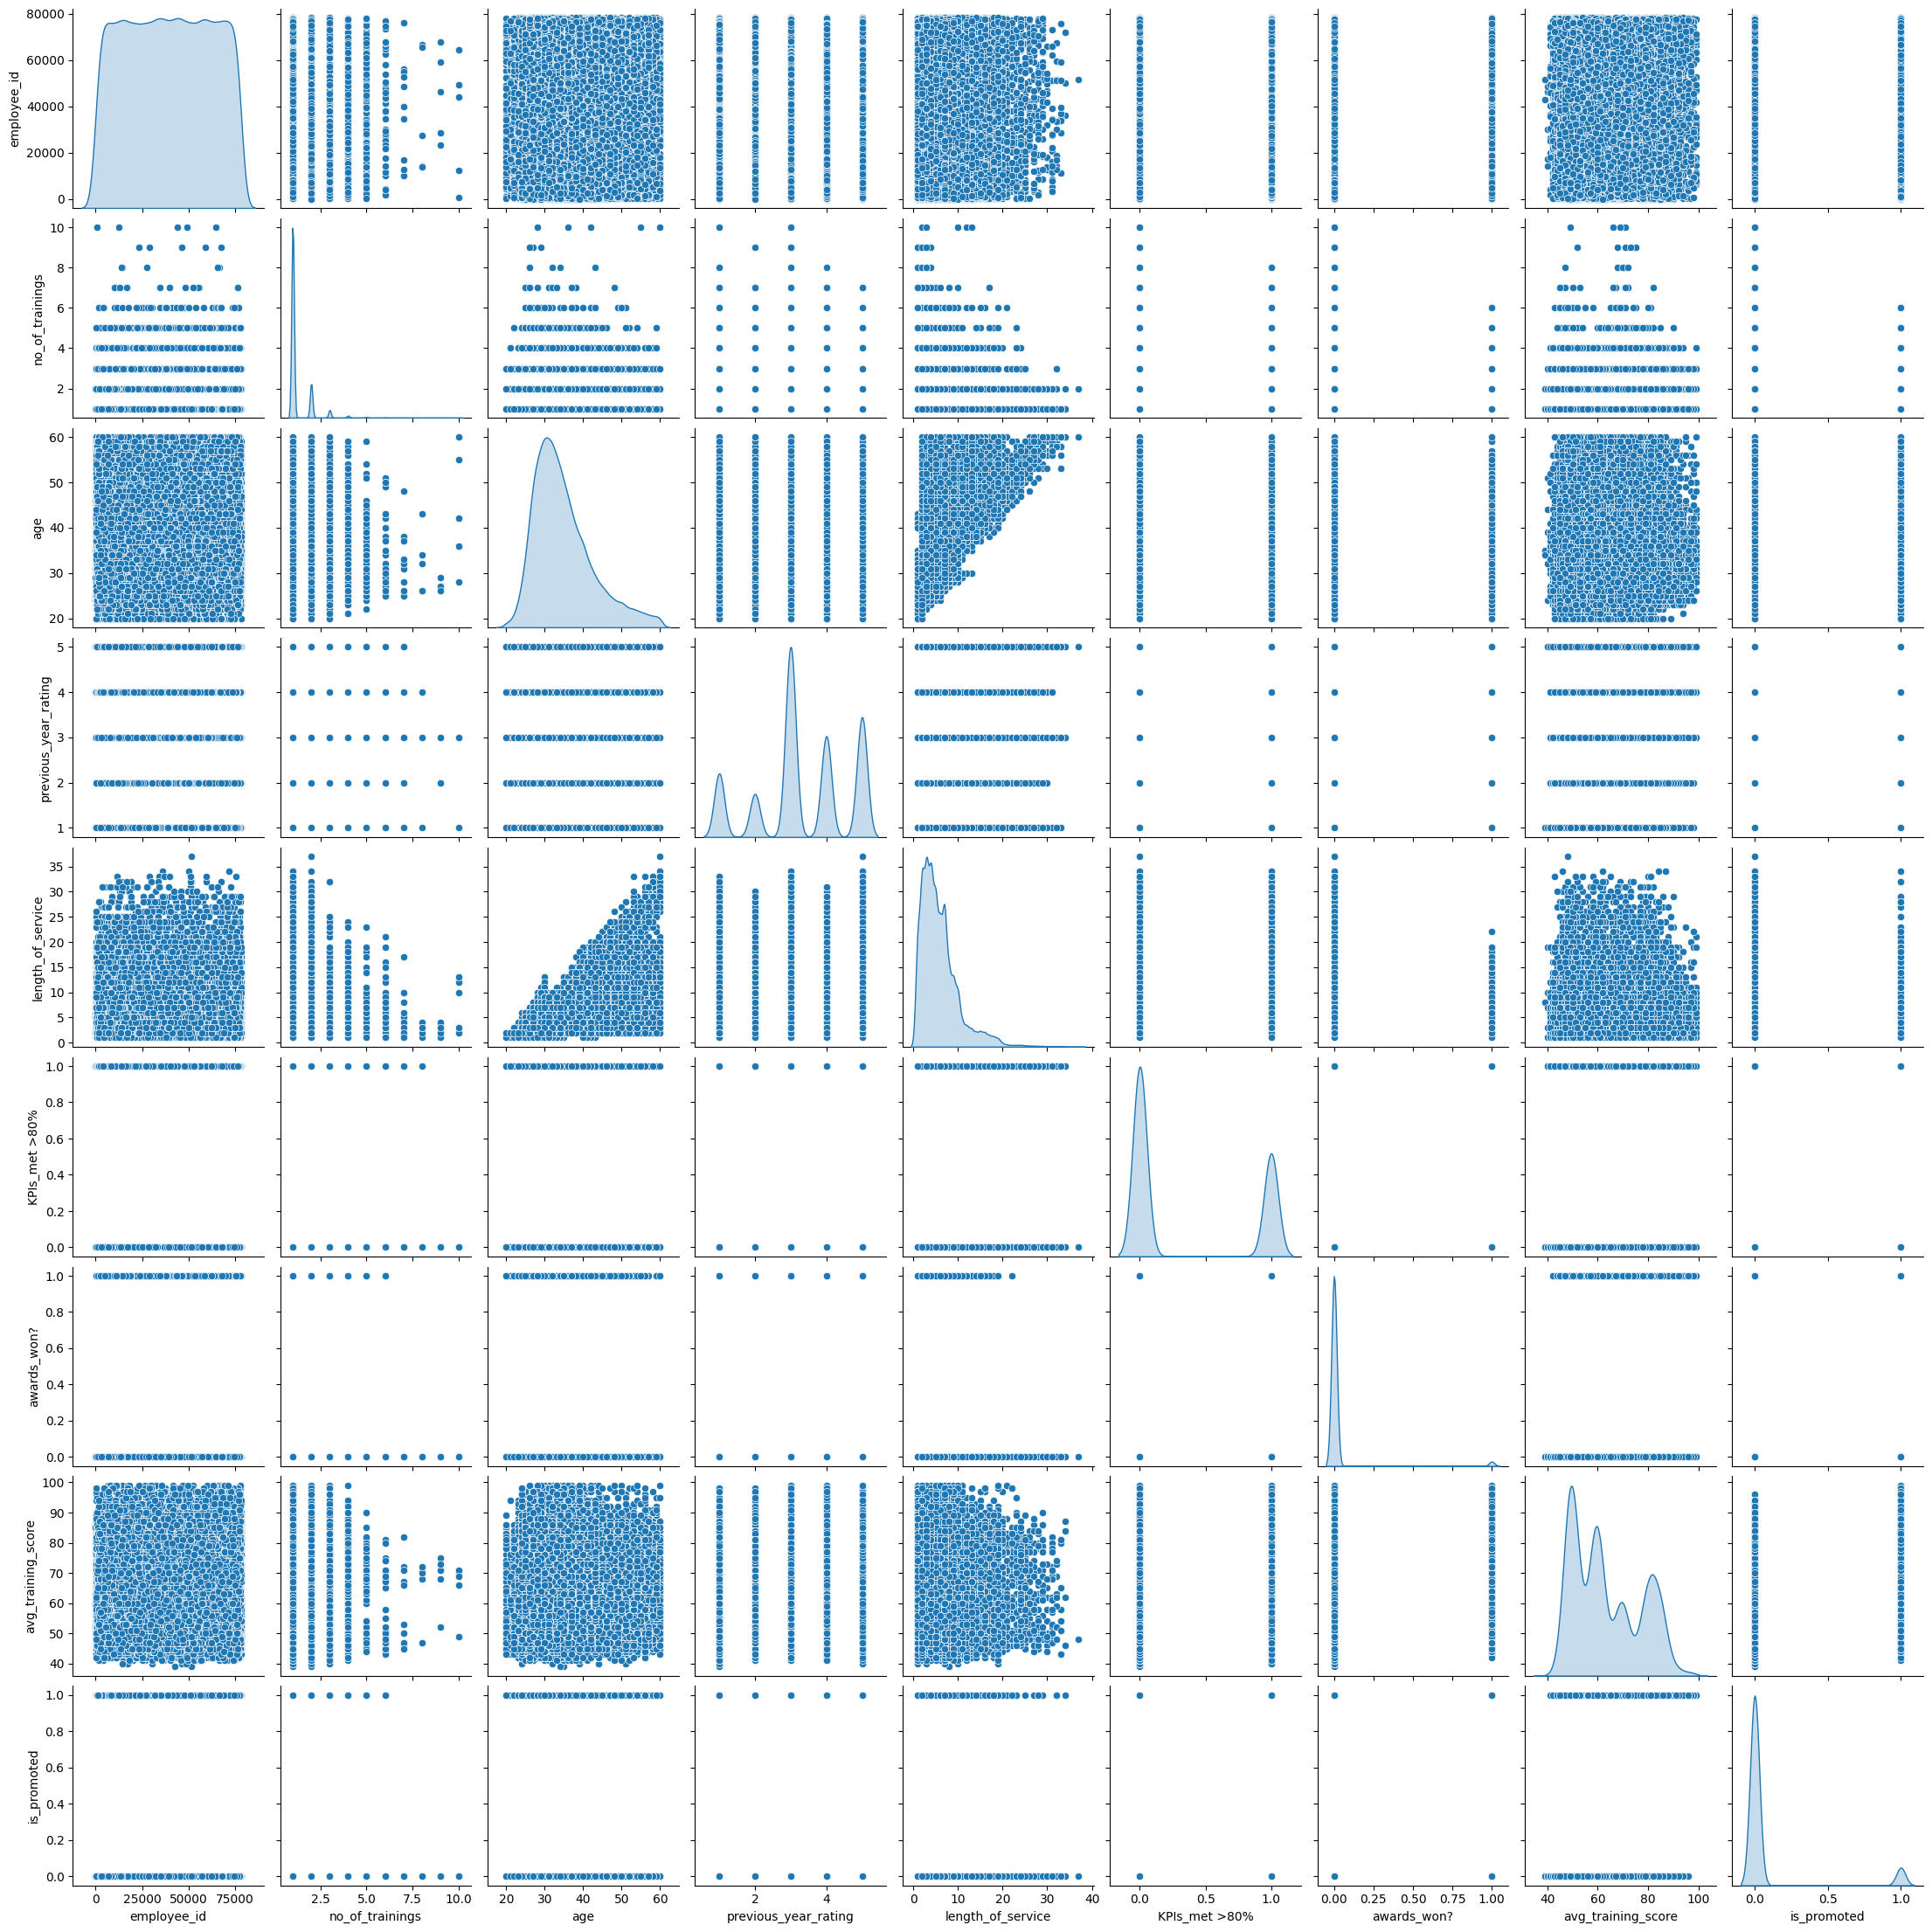

In [189]:
# Create pairplot with KDE for numerical columns only
sns.pairplot(train[numeric_columns], diag_kind='kde')
plt.show()

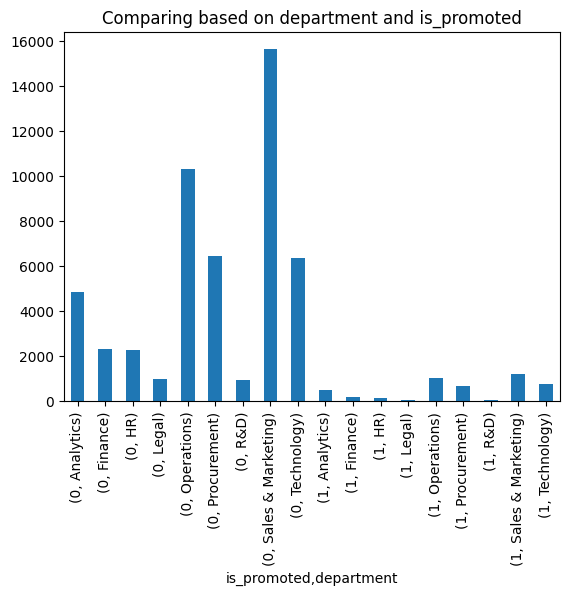

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64


In [190]:
#A bar plot of is_promoted by Department

train.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

#percentages of employess from each department who are promoted
d = train[train['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

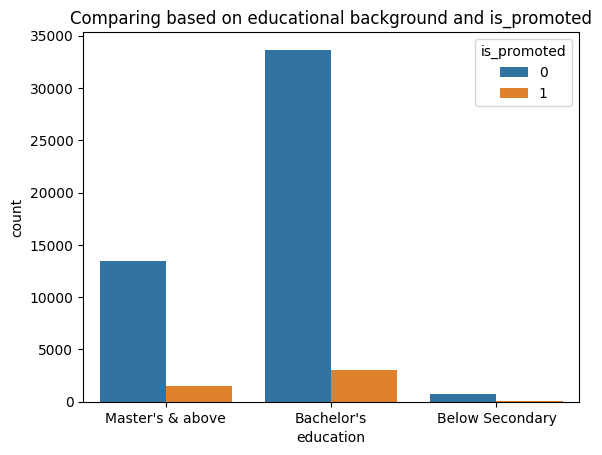

education
Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: proportion, dtype: float64

In [191]:
# Employees with which educational background have been promoted the most?

sns.countplot(x = 'education', hue = 'is_promoted', data = train)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

#print percentages of  Below Secondary,Bachelor's & Master's & above who are promoted
train[train['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

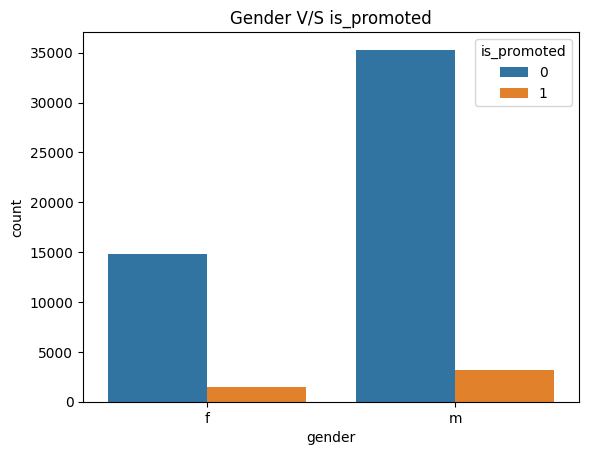

gender
m    68.573265
f    31.426735
Name: proportion, dtype: float64

In [192]:
# Gender V/S is_promoted

sns.countplot(x = 'gender', hue = 'is_promoted', data = train)
plt.title('Gender V/S is_promoted')
plt.show()

#percentages of females vs. males who are promoted
train[train['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

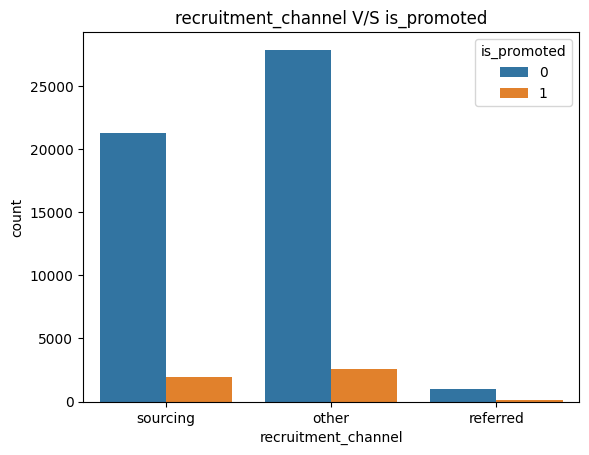

recruitment_channel
other       54.755784
sourcing    42.287918
referred     2.956298
Name: proportion, dtype: float64

In [193]:
# recruitment_channel V/S is_promoted

sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = train)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

train[train['is_promoted'] == 1]['recruitment_channel'].value_counts(normalize = True) * 100

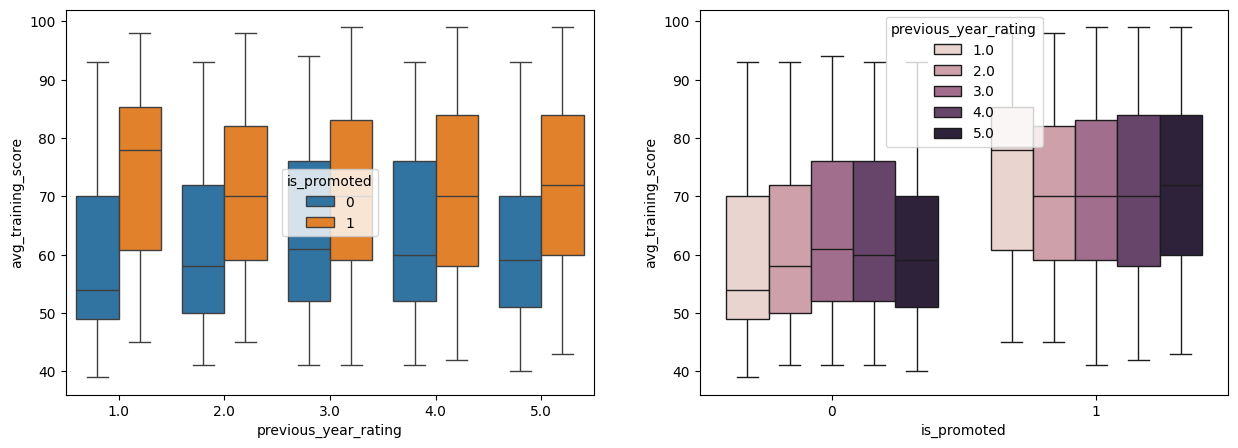

In [194]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# boxplot
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=train,hue='is_promoted', ax = axes[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=train,hue='previous_year_rating', ax = axes[1])
plt.show()

In [195]:
#average training score has a significant impact on the promotion

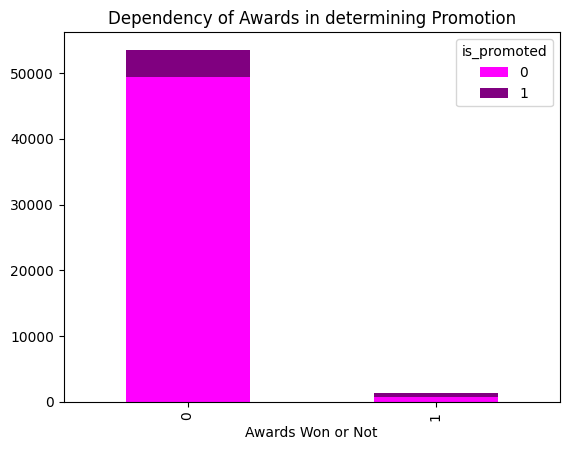

awards_won?
0    88.02485
1    11.97515
Name: proportion, dtype: float64

In [196]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

train[train['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

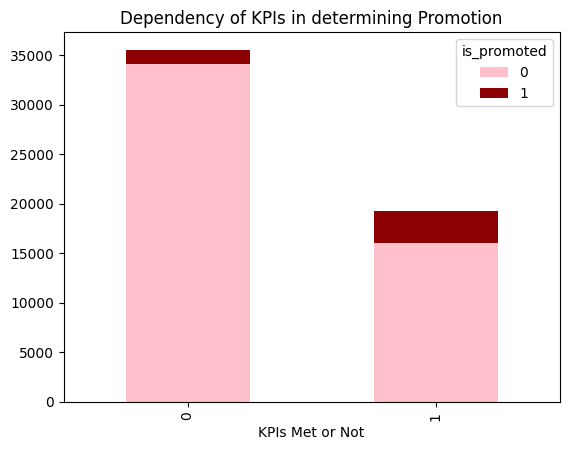

KPIs_met >80%
1    69.880034
0    30.119966
Name: proportion, dtype: float64


In [197]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

print(train[train['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

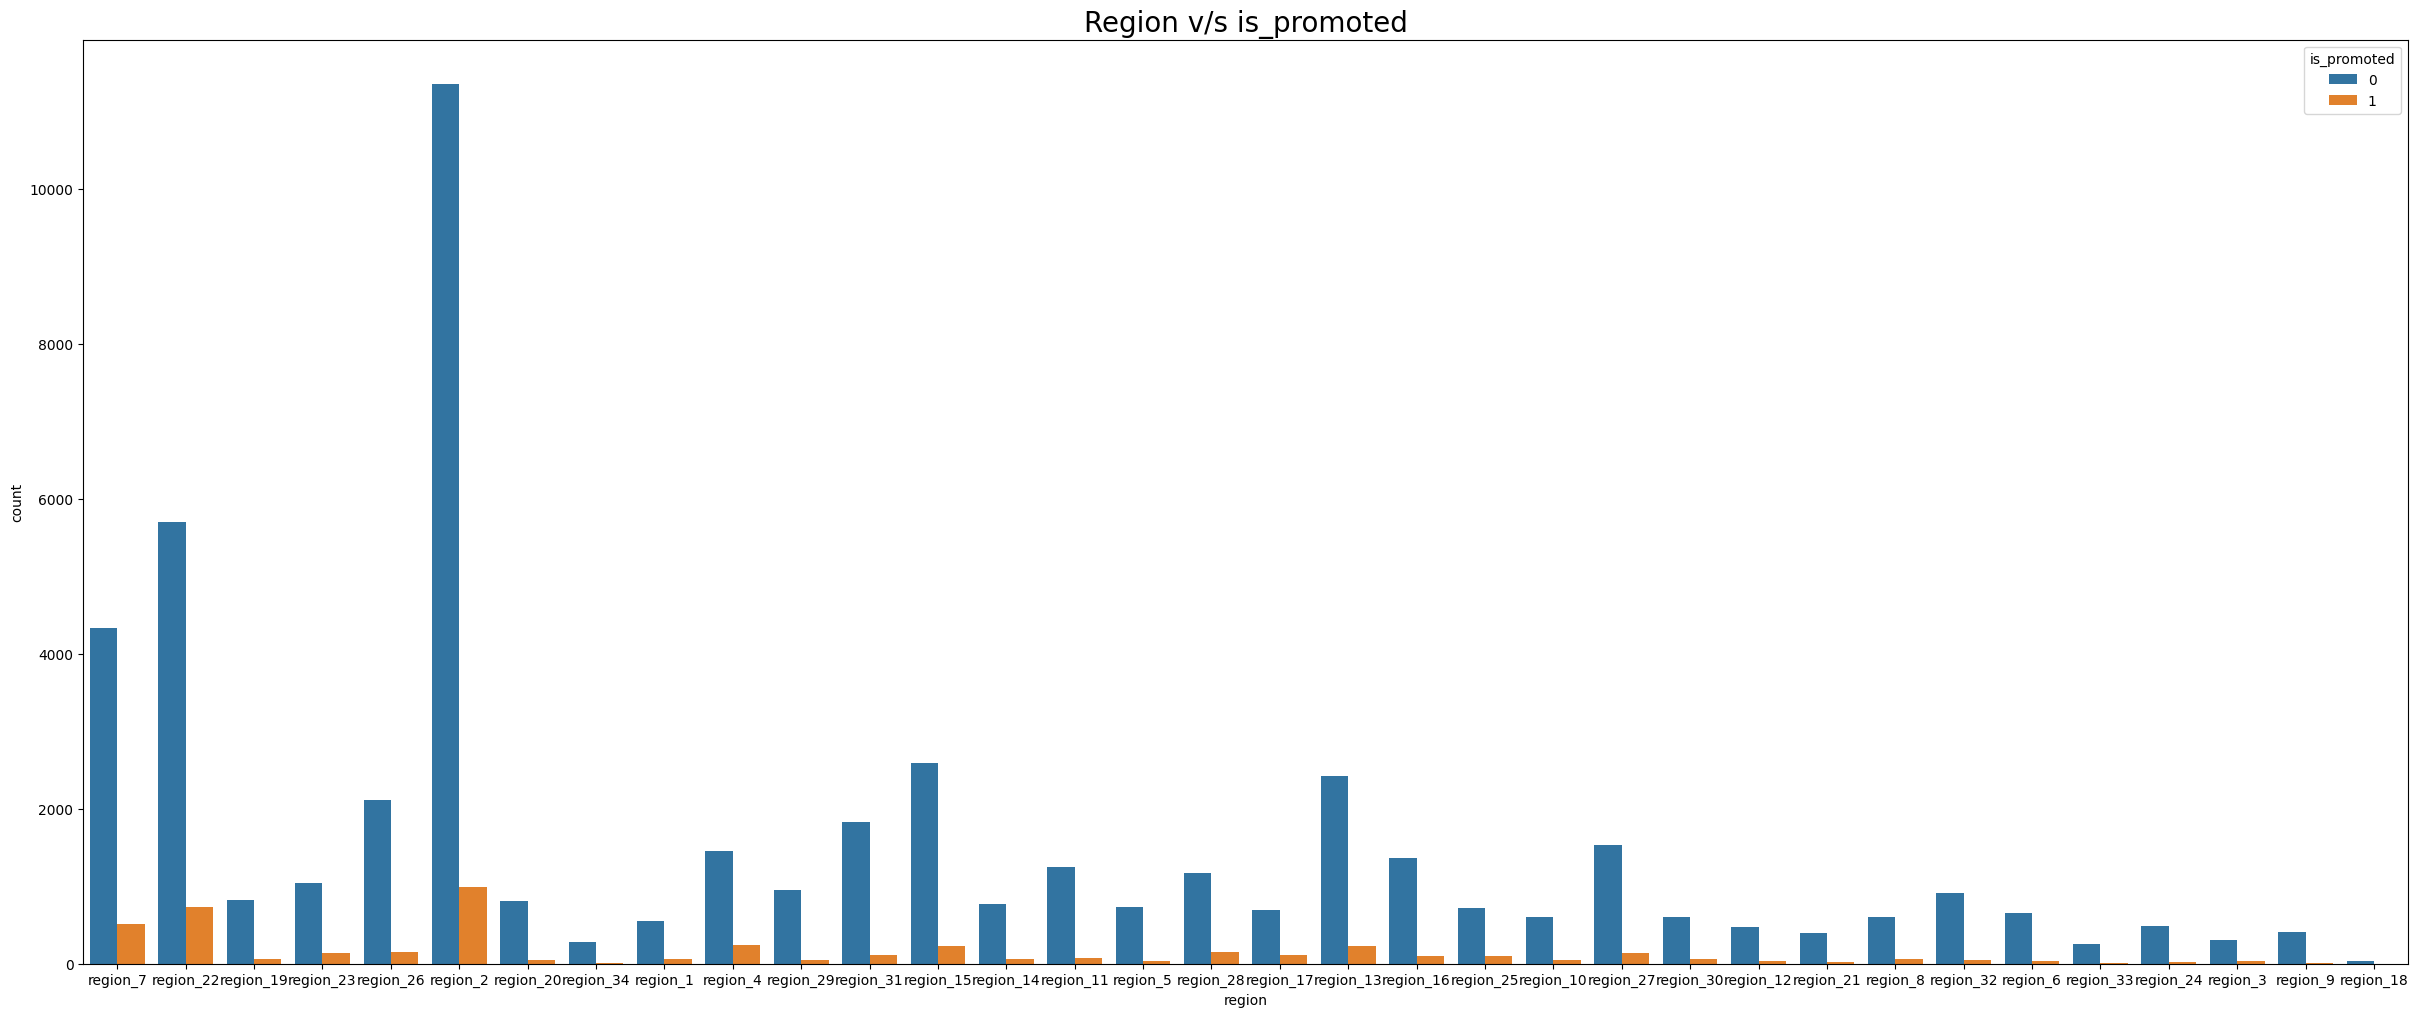

In [198]:
#Region and is_promoted

plt.figure(figsize=(30,12))
sns.countplot(x='region',data=train,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

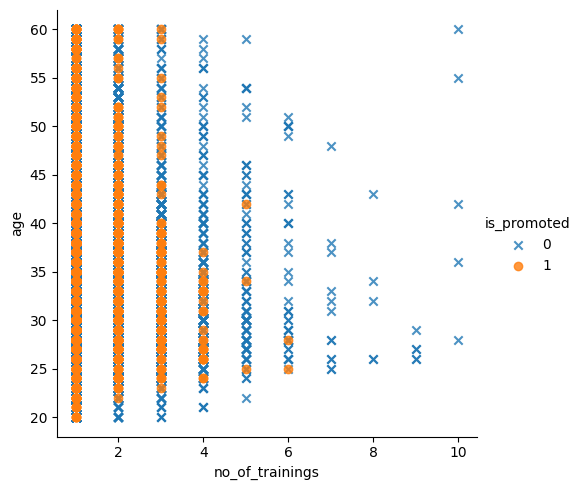

In [199]:
#no of trainings and is promoted
sns.lmplot(x='no_of_trainings',y='age',data=train,fit_reg=False,hue='is_promoted',markers=['x','o'])
plt.show()

Data Preprocessing

In [200]:
#checking missing values in train data
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [201]:
#checking missing values in test data
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [203]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [204]:
#encoding
# Selecting only the categorical columns for encoding
cat_columns = train.select_dtypes(include=['object']).columns

In [205]:
# One-hot encode categorical columns
train_encoded = pd.get_dummies(train, columns=cat_columns)

In [206]:
# Display the encoded DataFrame
print(train_encoded.head())

   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  \
0              1            0                  49            0   
1              0            0                  60            0   
2              0            0                  50            0   
3              0            0                  50            0   
4              0            0                  73            0   

   department_Analytics  ...  region_region_8  region_region_9  \
0                 False  ...            False     

In [207]:
# Handling Missing Values
train_encoded.fillna(train_encoded.mean(), inplace=True)  # Filling missing values with mean

In [208]:
train_encoded.isna().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_

In [209]:
# Selecting only the categorical columns for encoding
cat_columns_test = test.select_dtypes(include=['object']).columns

In [211]:
# One-hot encode categorical columns
test_encoded = pd.get_dummies(test, columns=cat_columns_test)

In [212]:
# Display the encoded DataFrame
print(test_encoded.head())

   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0         8724                1   24                   NaN                  1   
1        74430                1   31                   3.0                  5   
2        72255                1   31                   1.0                  4   
3        38562                3   31                   2.0                  9   
4        64486                1   30                   4.0                  7   

   KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
0              1            0                  77                 False   
1              0            0                  51                 False   
2              0            0                  47                 False   
3              0            0                  65                 False   
4              0            0                  61                 False   

   department_Finance  ...  region_region_8  region_region_9  

In [213]:
#handling missing values
test_encoded.fillna(test_encoded.mean(), inplace=True)  # Filling missing values with mean

In [214]:
test_encoded.isna().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_

In [215]:
#For submission
submit = test['employee_id']
submission = pd.DataFrame()
submission['employee_id'] = submit
submission['is_promoted'] = np.nan

In [216]:
train_encoded["is_promoted"] = train_encoded["is_promoted"].astype(int)

y = train_encoded["is_promoted"]
x = train_encoded.drop(labels = ["is_promoted"],axis = 1)

In [217]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (38365, 59)
Shape of x_valid:  (16443, 59)
Shape of y_train:  (38365,)
Shape of y_valid:  (16443,)


In [219]:
# Separate numerical and categorical columns
numerical_columns = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = x_train.select_dtypes(include=['object']).columns  # Assuming categorical columns are of 'object' type

In [221]:
# standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_numeric = scaler.fit_transform(x_train[numerical_columns])
x_test_numeric = scaler.transform(x_test[numerical_columns])
test_numeric = scaler.transform(test[numerical_columns])

Modelling

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report,f1_score

In [223]:
#Logistic Regression

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

Accuracy_score: 0.9157088122605364


In [224]:
f1_score(y_test, y_test_pred, zero_division=1)

0.0

*Decision Tree*

Hyperparameter Tuning

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 ,
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c07f82b370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c07f8cb490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c07f467f40>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [230]:
print(rsearch.best_params_)

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 4}


In [231]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9400234588817933
0.9024796913593973
0.9382107887855015
0.8736870072787007


In [233]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=x.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.446532
department_Sales & Marketing,0.144008
KPIs_met >80%,0.112938
awards_won?,0.063912
department_Procurement,0.062735
previous_year_rating,0.045980
department_Operations,0.039444
department_Analytics,0.023578
department_R&D,0.014162
age,0.007497


In [235]:
print(x.columns)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [236]:
# Feature selection (Dropping insignificant features)

x_new = x[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
           'KPIs_met >80%', 'avg_training_score', 'department_Analytics',
           'department_Finance', 'department_HR', 'department_Legal',
           'department_Operations', 'department_Procurement', 'department_R&D',
           'department_Sales & Marketing', 'department_Technology',
           'region_region_1', 'region_region_10', 'region_region_11',
           'region_region_12', 'region_region_13', 'region_region_14',
           'region_region_15', 'region_region_16', 'region_region_17',
           'region_region_18', 'region_region_19', 'region_region_2',
           'region_region_20', 'region_region_21', 'region_region_22',
           'region_region_23', 'region_region_24', 'region_region_25',
           'region_region_26', 'region_region_27', 'region_region_28',
           'region_region_29', 'region_region_3', 'region_region_30',
           'region_region_31', 'region_region_32', 'region_region_33',
           'region_region_34', 'region_region_4', 'region_region_5',
           'region_region_6', 'region_region_7', 'region_region_8',
           'region_region_9', "education_Bachelor's", 'education_Below Secondary',
           "education_Master's & above", 'gender_f', 'gender_m',
           'recruitment_channel_other', 'recruitment_channel_referred',
           'recruitment_channel_sourcing']]
y_new = y

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 ,
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(x_new,y_new)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c07f81fd30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c07fa26620>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c07f8f8520>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [238]:
print(rsearch.best_params_)

{'max_depth': 11, 'min_samples_leaf': 11, 'min_samples_split': 7}


In [239]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_new,y_new,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9411182066988141
0.908337893514872
0.9407650672018488
0.8849282172414557


In [243]:
print(test.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


In [244]:
test_new = test[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']]

*Model* *Submission*

Model submission
dt = DecisionTreeClassifier(**rsearch.best_params_)

dt.fit(X_new,y_new) predict = dt.predict(test_new)

submission['is_promoted'] = predict

submission.to_csv('Sample_Submission_dt_new.csv',index=False)

In [246]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=x_new.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.469747
department_Sales & Marketing,0.166214
KPIs_met >80%,0.110390
department_Procurement,0.068068
department_Operations,0.042285
previous_year_rating,0.040330
department_Analytics,0.022153
department_Technology,0.018893
department_R&D,0.015117
age,0.009298


In [249]:
# Feature selection (Dropping insignificant features)

x_new2 = x[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
           'KPIs_met >80%', 'avg_training_score', 'department_Analytics',
           'department_Finance', 'department_HR', 'department_Legal',
           'department_Operations', 'department_Procurement', 'department_R&D',
           'department_Sales & Marketing', 'department_Technology',
           'region_region_1', 'region_region_10', 'region_region_11',
           'region_region_12', 'region_region_13', 'region_region_14',
           'region_region_15', 'region_region_16', 'region_region_17',
           'region_region_18', 'region_region_19', 'region_region_2',
           'region_region_20', 'region_region_21', 'region_region_22',
           'region_region_23', 'region_region_24', 'region_region_25',
           'region_region_26', 'region_region_27', 'region_region_28',
           'region_region_29', 'region_region_3', 'region_region_30',
           'region_region_31', 'region_region_32', 'region_region_33',
           'region_region_34', 'region_region_4', 'region_region_5',
           'region_region_6', 'region_region_7', 'region_region_8',
           'region_region_9', "education_Bachelor's", 'education_Below Secondary',
           "education_Master's & above", 'gender_f', 'gender_m',
           'recruitment_channel_other', 'recruitment_channel_referred',
           'recruitment_channel_sourcing']]
y_new2 = y

In [250]:
#Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 ,
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(x_new2,y_new2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c09af0dcc0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c09af0c0a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79c09af0e860>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [251]:
print(rsearch.best_params_)

{'max_depth': 11, 'min_samples_leaf': 11, 'min_samples_split': 7}


In [252]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_new2,y_new2,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9411182066988141
0.908337893514872
0.9407650672018488
0.8852559821511077


In [253]:
test_new2 = test[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']]

In [255]:
### RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_train_pred = rf.predict(x_train)
y_train_prob = rf.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = rf.predict(x_test)
y_test_prob = rf.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9998696728789261
0.9999998825592317
0.934926716535912
0.8766931895157996


In [259]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.0 MB/s eta 0:00:00


In [261]:
## catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(x_train,y_train)

y_train_pred = cat.predict(x_train)
y_train_prob = cat.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = cat.predict(x_test)
y_test_prob = cat.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

Learning rate set to 0.048896
0:	learn: 0.6262313	total: 99.4ms	remaining: 1m 39s
1:	learn: 0.5781401	total: 157ms	remaining: 1m 18s
2:	learn: 0.5388178	total: 216ms	remaining: 1m 11s
3:	learn: 0.5014838	total: 303ms	remaining: 1m 15s
4:	learn: 0.4710631	total: 364ms	remaining: 1m 12s
5:	learn: 0.4447700	total: 424ms	remaining: 1m 10s
6:	learn: 0.4049357	total: 473ms	remaining: 1m 7s
7:	learn: 0.3852588	total: 519ms	remaining: 1m 4s
8:	learn: 0.3679822	total: 601ms	remaining: 1m 6s
9:	learn: 0.3536412	total: 624ms	remaining: 1m 1s
10:	learn: 0.3406933	total: 650ms	remaining: 58.4s
11:	learn: 0.3293678	total: 686ms	remaining: 56.5s
12:	learn: 0.3202374	total: 740ms	remaining: 56.2s
13:	learn: 0.3065142	total: 768ms	remaining: 54.1s
14:	learn: 0.2980355	total: 802ms	remaining: 52.7s
15:	learn: 0.2898241	total: 839ms	remaining: 51.6s
16:	learn: 0.2832001	total: 875ms	remaining: 50.6s
17:	learn: 0.2750833	total: 921ms	remaining: 50.2s
18:	learn: 0.2699285	total: 959ms	remaining: 49.5s
19:	

In [262]:
##XGBoost

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
y_train_prob = xgb.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = xgb.predict(x_test)
y_test_prob = xgb.predict_proba(x_test)[:,1]

print('\n')
print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9477648898735826
0.9641705179409303


0.9419205741044822
0.90352733655762


In [263]:
imp = pd.DataFrame(xgb.feature_importances_,index=x_new2.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
KPIs_met >80%,0.169514
department_Sales & Marketing,0.130266
department_Operations,0.071227
department_Procurement,0.068867
department_Finance,0.043099
department_Analytics,0.040460
avg_training_score,0.040032
department_HR,0.032172
department_R&D,0.032057
previous_year_rating,0.023464
